---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [1]:
def answer_one():
    return "ANSWER"

## Question 1

The way Pandas opens Excel files it's very similar the way the csv files are opened. In order to open the document just use _pd.ExcelFile(filename)_ 

In [26]:
import pandas as pd
# Open excel files
excelFile = pd.ExcelFile("Energy Indicators.xls")

In excel files you need to know the excel sheet name before parse it.

>Basics of how to use Jupyter notebook 
>https://www.packtpub.com/books/content/basics-jupyter-notebook-and-python
>
>Some tips and tricks
>https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
>
>Press Tab to see all the methods avaiable.


In [27]:
excelFile.sheet_names

['Energy']

In [74]:
?excelFile.parse

For further information go to the following link. This will explain each parameter and the data supported.
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html

In [87]:
energy = excelFile.parse(excelFile.sheet_names[0], skiprows=17, skip_footer=True)

In [86]:
energy.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Petajoules,Gigajoules,%
0,NaN,Afghanistan,Afghanistan,321,10,78.669280
1,NaN,Albania,Albania,102,35,100.000000
2,NaN,Algeria,Algeria,1959,51,0.551010
3,NaN,American Samoa,American Samoa,...,...,0.641026
4,NaN,Andorra,Andorra,9,121,88.695650


In [88]:
energy = excelFile.parse(excelFile.sheet_names[0], \
                         names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],\
                         skiprows=17, skip_footer=0, parse_cols="C:F")

In [89]:
# Lets see the header. See the column names, selected columns and the starting rows.
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


Lets see the footer, we have to see the last footer called: 
    
        Line 245:  Zimbabwe	Zimbabwe	  480	  32	 52.54	


In [78]:
energy.tail(5)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
259,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN
263,NaN,NaN,NaN,NaN


Seeing the trail seems to be: 

    263 - 245 = 18
    
However seeing the original excel file the last row it's number 283 so.

    283 - 245 = 38 rows needed for the footer

In [100]:
energy = excelFile.parse(excelFile.sheet_names[0], \
                         names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],\
                         skiprows=17, skip_footer=38, parse_cols="C:F")

In [101]:
energy.tail(5)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
222,Viet Nam,2554,28,45.32152
223,Wallis and Futuna Islands,0,26,0.00000
224,Yemen,344,13,0.00000
225,Zambia,400,26,99.71467
226,Zimbabwe,480,32,52.53612


This is fine, we could see the total number of rows and columns by using the shape attribute of the dataframe.

> ***Always try to check with the original Excel opened with another editor to compare the outputs***

In [102]:
energy.shape

(227, 4)

Let's do some changes to the dataframe:

- Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

- Rename the following list of countries (for use in later questions):

        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"

- There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,

        e.g.
        'Bolivia (Plurinational State of)' should be 'Bolivia',
        'Switzerland17' should be 'Switzerland'.

For the first point I could "apply" an opration to that serie, I would like to do inplace so the original is modified to keep working on

In [103]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


In [104]:
energy["Energy Supply"] = energy["Energy Supply"].apply(lambda x: x * 1000000)

In [122]:
# Let's see the header again to see the changes made after apply
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,.................................................,...,0.641026
4,Andorra,9000000,121,88.695650


Now let's get rid of the nan values with "..."

In [125]:
import numpy as np

In [133]:
energy = energy.applymap(lambda x: np.nan if isinstance(x, str) and ".." in x else x)

In [134]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


Let's rename the countries. For this opearation I can use a series function called map. However if there is only one value per country, I can directly remap the values directly using indexing.


In [111]:
country_filter = energy["Country"].isin(["Republic of Korea", \
                                       "United States of America", \
                                       "United Kingdom of Great Britain and Northern Ireland", \
                                       "China, Hong Kong Special Administrative Region"])


In [112]:
energy[country_filter]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
164,Republic of Korea,11007000000,221,2.279353


In [120]:
country_filter = energy["Country"] == "United States of America20"

In [121]:
energy[country_filter]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
216,United States of America20,90838000000,286,11.57098


In [118]:
country_filter = energy["Country"] == "Republic of Korea"

In [119]:
energy[country_filter]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
164,Republic of Korea,11007000000,221,2.279353


Let's try with replace

        df["col1"].replace(di, inplace=True).

In [164]:
di = {"Republic of Korea": "South Korea", \
    "United States of America*": "United States", \
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", \
    "China, Hong Kong Special Administrative Region": "Hong Kong"}

In [165]:
test = energy["Country"].replace(di)

In [150]:
country_filter = test == "South Korea"
test[country_filter]

164    South Korea
Name: Country, dtype: object

I could replace those values directly inplace

In [166]:
energy["Country"].replace(di, inplace=True)

In [167]:
country_filter = energy["Country"].isin(["Republic of Korea", \
                                       "United States of America", \
                                       "United Kingdom of Great Britain and Northern Ireland", \
                                       "China, Hong Kong Special Administrative Region"])

In [159]:
energy[country_filter]

,Country,Energy Supply,Energy Supply per Capita,% Renewable


In [168]:
country_filter = energy["Country"].isin(["South Korea", \
                                       "United States", \
                                       "United Kingdom", \
                                       "Hong Kong"])

In [171]:
energy[country_filter]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
164,South Korea,1.100700e+10,221.0,2.279353


Remove first the countries that have some number or a parenteis, then we can apply the replace function more easily

In [172]:
some_text = 'Bolivia (Plurinational State of)'

In [175]:
st_spplite = some_text.split("(")
st_spplite

['Bolivia ', 'Plurinational State of)']

In [177]:
st_spplite[0].rstrip()

'Bolivia'

In [181]:
some_int_text = 'Switzerland17'
some_text = ''.join(i for i in some_int_text if not i.isdigit())
some_text

'Switzerland'

Let's create a function that cleans the data. This will be used in conjuction with the apply function in Pandas series.

In [194]:
def clean(x):
    # Remove the parenthesis first
    # Also remove all the integer values. These valuee will be replaced by empty values
    return ''.join(i for i in x.split("(")[0].rstrip() if not i.isdigit())


In [189]:
test1 = "Javi34 (Plurinational State of)"
test2 = test1.split("(")[0].rstrip()
test3 = ''.join(i for i in test2 if not i.isdigit())
test3


'Javi'

In [190]:
test1 = "Javi34 (Plurinational State of)"
test2 = ''.join(i for i in test1.split("(")[0].rstrip() if not i.isdigit())
test2

'Javi'

In [195]:
test2 = clean(test1)
test2

'Javi'

In [196]:
energy["Country"] = energy["Country"].apply(lambda x: ''.join(i for i in x.split("(")[0].rstrip() if not i.isdigit()))

In [198]:
energy.head(30)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
5,Angola,6.420000e+08,27.0,70.909090
6,Anguilla,2.000000e+06,136.0,0.000000
7,Antigua and Barbuda,8.000000e+06,84.0,0.000000
8,Argentina,3.378000e+09,79.0,24.064520
9,Armenia,1.430000e+08,48.0,28.236060


In [206]:
di = {"Republic of Korea": "South Korea", \
    "United States of America": "United States", \
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", \
    "China, Hong Kong Special Administrative Region": "Hong Kong"}
energy["Country"].replace(di, inplace=True)
country_filter = energy["Country"].isin(["South Korea", \
                                          "United States", \
                                          "United Kingdom", \
                                          "Hong Kong"])
energy[country_filter]


,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,5.850000e+08,82.0,0.000000
164,South Korea,1.100700e+10,221.0,2.279353
214,United Kingdom,7.920000e+09,124.0,10.600470
216,United States,9.083800e+10,286.0,11.570980


In [213]:
country_filter = energy["Country"].str.contains("United States")
energy[country_filter]


,Country,Energy Supply,Energy Supply per Capita,% Renewable
216,United States,9.083800e+10,286.0,11.57098
217,United States Virgin Islands,NaN,NaN,0.00000


## Lets summarize all the operations done for the first task



In [ ]:
import pandas as pd
import numpy as np

In [240]:
# Open excel files
excelFile = pd.ExcelFile("Energy Indicators.xls")

# Load the file but using the energy sheet, specified columns names,
# interval index columns, skip header rows and skipped footer rows
energy = excelFile.parse(excelFile.sheet_names[0], \
                         names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],\
                         skiprows=17, skip_footer=38, parse_cols="C:F")

# Clean the empty values
# For this is will search for all the values that contains at ".." at least
energy = energy.applymap(lambda x: np.nan if isinstance(x, str) and ".." in x else x)	

#Convert from petajoule to gigajoules
energy["Energy Supply"] = energy["Energy Supply"].apply(lambda x: x * 1000000)

# Remove the sub-string from the first parenthesis
# Also remove all the integer values contained within the string. These valuee will be replaced by empty values
energy["Country"] = energy["Country"].apply(lambda x: ''.join(i for i in x.split("(")[0].rstrip() if not i.isdigit()))

#Change some of the Country names. Previous changes will helpus to simplify this operation
di = {"Republic of Korea": "South Korea", \
    "United States of America": "United States", \
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", \
    "China, Hong Kong Special Administrative Region": "Hong Kong"}
energy["Country"].replace(di, inplace=True)

## Let's read GDP File Now

In [215]:
GDP = pd.read_csv("world_bank.csv",skiprows=4)

In [217]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.933129e+10,NaN,NaN
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.026269e+11,NaN,NaN
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139839e+10,NaN,NaN


Rename the following countries

In [219]:
di = {"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"}
GDP["Country Name"].replace(di, inplace=True)

In [237]:
#Testing the replace operation
country_filter = GDP["Country Name"].isin(["South Korea", \
                                          "Iran", \
                                          "Hong Kong"])
GDP[country_filter]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
93,Hong Kong,HKG,GDP (current US$),NY.GDP.MKTP.CD,1.320797e+09,1.383682e+09,1.612346e+09,1.935298e+09,2.206466e+09,2.435079e+09,...,2.192797e+11,2.140464e+11,2.286377e+11,2.485136e+11,2.626294e+11,2.756588e+11,2.912285e+11,3.092345e+11,NaN,NaN
109,Iran,IRN,GDP (current US$),NY.GDP.MKTP.CD,4.199134e+09,4.426949e+09,4.693566e+09,4.928628e+09,5.379846e+09,6.197320e+09,...,3.971896e+11,3.989781e+11,4.677902e+11,5.920378e+11,5.872094e+11,5.116209e+11,4.253261e+11,NaN,NaN,NaN
123,South Korea,KOR,GDP (current US$),NY.GDP.MKTP.CD,3.891847e+09,2.357060e+09,2.745940e+09,3.863727e+09,3.358134e+09,3.017614e+09,...,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.377873e+12,NaN,NaN


## Let's read Sciem File Now

In [229]:
file_ScimEn = pd.ExcelFile("scimagojr-3.xlsx")

In [230]:
file_ScimEn.sheet_names

['Sheet1']

In [236]:
ScimEn = file_ScimEn.parse(file_ScimEn.sheet_names[0])
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries.

In [238]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.933129e+10,NaN,NaN
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.026269e+11,NaN,NaN
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139839e+10,NaN,NaN


In [242]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


In [244]:
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


The way Pandas merge dataframes is two by two, so we can perform "boolean" operations like: join, intersect, left, right, etc.. 

        how : {'left', 'right', 'outer', 'inner'}, default 'inner'
            * left: use only keys from left frame (SQL: left outer join)
            * right: use only keys from right frame (SQL: right outer join)
            * outer: use union of keys from both frames (SQL: full outer join)
            * inner: use intersection of keys from both frames (SQL: inner join)

I like to procded from back to from so if the order is:  1 - GDP 2- Energy 3 - and ScimEn 

We first do the merge between (2,3) and (1, (2,3))

In [247]:
?pd.merge

In [251]:
merged = pd.merge(energy,ScimEn, how='outer', on="Country")

In [254]:
merged.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,Afghanistan,3.210000e+08,10.0,78.669280,163.0,3.0,3.0,0.0,0.0,0.00,0.0
1,Albania,1.020000e+08,35.0,100.000000,118.0,23.0,23.0,168.0,14.0,7.30,6.0
2,Algeria,1.959000e+09,51.0,0.551010,42.0,1215.0,1197.0,7393.0,1413.0,6.08,40.0
3,American Samoa,NaN,NaN,0.641026,180.0,1.0,1.0,0.0,0.0,0.00,0.0
4,Andorra,9.000000e+06,121.0,88.695650,168.0,2.0,2.0,13.0,0.0,6.50,1.0


In [257]:
merged = pd.merge(GDP,merged, how='outer', left_on="Country Name", right_on="Country")
merged.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Energy Supply,Energy Supply per Capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,12000000.0,120.0,14.87069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9000000.0,121.0,88.69565,168.0,2.0,2.0,13.0,0.0,6.50,1.0
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,321000000.0,10.0,78.66928,163.0,3.0,3.0,0.0,0.0,0.00,0.0
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,642000000.0,27.0,70.90909,99.0,50.0,50.0,79.0,0.0,1.58,5.0
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,102000000.0,35.0,100.00000,118.0,23.0,23.0,168.0,14.0,7.30,6.0


In [259]:
merged.loc[:,["Country Name", "Country"]].head()

,Country Name,Country
0,Aruba,Aruba
1,Andorra,Andorra
2,Afghanistan,Afghanistan
3,Angola,Angola
4,Albania,Albania


Now let's try some filters before apply the final merge.

> Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

In [261]:
ScimEn[ScimEn["Rank"]<16].head(20)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [263]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.933129e+10,NaN,NaN
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.026269e+11,NaN,NaN
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139839e+10,NaN,NaN


In [268]:
#(2006-2015)
GDP.loc[:,"2006":"2015"].head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN
1,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN
2,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.933129e+10
3,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.026269e+11
4,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139839e+10


In [269]:
GDP.iloc[:,0:4].head()

,Country Name,Country Code,Indicator Name,Indicator Code
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD
1,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD


In [272]:
tot_GDP = pd.merge(GDP.iloc[:,0:4],GDP.loc[:,"2006":"2015"],left_index = True,right_index = True)

In [274]:
tot_GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.933129e+10
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.026269e+11
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139839e+10


In [278]:
# Use following information to merge (inner intersection)
# ScimEn[ScimEn["Rank"]<16].head(20)
# pd.merge(GDP.iloc[:,0:4],GDP.loc[:,"2006":"2015"],left_index = True,right_index = True)

#pd.merge(energy,ScimEn, how='inner', on="Country")
#pd.merge(GDP,merged, how='inner', left_on="Country Name", right_on="Country")

filtered_GDP = pd.merge(GDP.iloc[:,0:4],GDP.loc[:,"2006":"2015"],left_index=True,right_index=True)
filtered_ScimEn = ScimEn[ScimEn["Rank"]<16]
energy_ScimEn = pd.merge(energy, filtered_ScimEn , how='inner', on="Country")
merge = pd.merge(filtered_GDP, energy_ScimEn ,how='inner', left_on="Country Name", right_on="Country")

In [281]:
merge.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,...,Energy Supply,Energy Supply per Capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,7.468808e+11,8.530533e+11,1.054558e+12,9.265638e+11,1.142251e+12,1.389919e+12,...,5.386000e+09,231.0,11.81081,14,8831,8725,90765,15606,10.28,107
1,Brazil,BRA,GDP (current US$),NY.GDP.MKTP.CD,1.107640e+12,1.397084e+12,1.695825e+12,1.667020e+12,2.208872e+12,2.614573e+12,...,1.214900e+10,59.0,69.64803,15,8668,8596,60702,14396,7.00,86
2,Canada,CAN,GDP (current US$),NY.GDP.MKTP.CD,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613406e+12,1.788703e+12,...,1.043100e+10,296.0,61.94543,6,17899,17620,215003,40930,12.01,149
3,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,2.752132e+12,3.552183e+12,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,...,1.271910e+11,93.0,19.75491,1,127050,126767,597237,411683,4.70,138
4,Germany,DEU,GDP (current US$),NY.GDP.MKTP.CD,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417298e+12,3.757465e+12,...,1.326100e+10,165.0,17.90153,7,17027,16831,140566,27426,8.26,126


In [284]:
merge.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Country', 'Energy Supply', 'Energy Supply per Capita',
       '% Renewable', 'Rank', 'Documents', 'Citable documents', 'Citations',
       'Self-citations', 'Citations per document', 'H index'],
      dtype='object')

In [286]:
columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

In [291]:
merge = merge.loc[:,columns]
merge.sort_values("Rank")

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,2.752132e+12,3.552183e+12,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.100772e+13
14,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.385589e+13,1.447764e+13,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.803665e+13
11,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700096e+12,6.157461e+12,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12
7,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.678278e+12,3.063005e+12,2.875463e+12,2.367127e+12,2.429603e+12,2.608995e+12,2.646003e+12,2.719509e+12,2.998834e+12,2.858003e+12
13,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,9.899305e+11,1.299705e+12,1.660844e+12,1.222644e+12,1.524916e+12,2.034007e+12,2.154067e+12,2.231827e+12,2.052807e+12,1.331208e+12
2,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613406e+12,1.788703e+12,1.824289e+12,1.837443e+12,1.783776e+12,1.550537e+12
4,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417298e+12,3.757465e+12,3.543984e+12,3.752514e+12,3.879277e+12,3.363447e+12
8,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,9.491168e+11,1.201072e+12,1.186913e+12,1.323896e+12,1.656562e+12,1.822990e+12,1.828985e+12,1.863208e+12,2.042439e+12,2.095398e+12
6,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.325012e+12,2.663113e+12,2.923466e+12,2.693827e+12,2.646995e+12,2.862502e+12,2.681416e+12,2.808511e+12,2.839162e+12,2.418836e+12
12,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,1.011797e+12,1.122679e+12,1.002219e+12,9.019350e+11,1.094499e+12,1.202464e+12,1.222807e+12,1.305605e+12,1.411334e+12,1.377873e+12


In [293]:
merge.shape

(15, 20)

## SOLUTION QUESTION 1

In [2]:
import pandas as pd
import numpy as np

def load_energy():
    # Open excel files
    excelFile = pd.ExcelFile("Energy Indicators.xls")

    # Load the file but using the energy sheet, specified columns names,
    # interval index columns, skip header rows and skipped footer rows
    energy = excelFile.parse(excelFile.sheet_names[0], \
                             names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],\
                             skiprows=17, skip_footer=38, parse_cols="C:F")

    # Clean the empty values
    # For this is will search for all the values that contains at ".." at least
    energy = energy.applymap(lambda x: np.nan if isinstance(x, str) and ".." in x else x)	

    #Convert from petajoule to gigajoules
    energy["Energy Supply"] = energy["Energy Supply"].apply(lambda x: x * 1000000)

    # Remove the sub-string from the first parenthesis
    # Also remove all the integer values contained within the string. These valuee will be replaced by empty values
    energy["Country"] = energy["Country"].apply(lambda x: ''.join(i for i in x.split("(")[0].rstrip() if not i.isdigit()))

    #Change some of the Country names. Previous changes will helpus to simplify this operation
    di = {"Republic of Korea": "South Korea", \
        "United States of America": "United States", \
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", \
        "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy["Country"].replace(di, inplace=True)
    return energy

def load_GDP():
    GDP = pd.read_csv("world_bank.csv",skiprows=4)
    # Rename some of the countruies names
    di = {"Korea, Rep.": "South Korea", 
          "Iran, Islamic Rep.": "Iran",
          "Hong Kong SAR, China": "Hong Kong"}
    GDP["Country Name"].replace(di, inplace=True)
    return GDP

def load_ScimEn():
    file_ScimEn = pd.ExcelFile("scimagojr-3.xlsx")
    # Nothing special in this document
    ScimEn = file_ScimEn.parse(file_ScimEn.sheet_names[0])
    return ScimEn

def load_docs():
    return [load_energy(), load_GDP(), load_ScimEn() ]

def answer_one():
    # Load the documents
    energy, GDP, ScimEn = load_docs()
    #Use following information to merge (inner intersection)
    filtered_GDP = pd.merge(GDP.iloc[:,0:4],GDP.loc[:,"2006":"2015"],left_index=True,right_index=True)
    filtered_ScimEn = ScimEn[ScimEn["Rank"]<16]
    energy_ScimEn = pd.merge(energy, filtered_ScimEn , how='inner', on="Country")
    merged = pd.merge(filtered_GDP, energy_ScimEn ,how='inner', left_on="Country Name", right_on="Country")
    # Finally, select the columns and sor the values
    columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
               'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
               '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011',
               '2012', '2013', '2014', '2015']
    merged = merged.loc[:,columns]
    return merged.sort_values("Rank")

**This solutionis not exactly what the assignment want. The filtering of the Top 15 must be done after all the merge is done. The question number two ask for the data that is lost after this Top 15 filtering...**

In [3]:
answer_one().head(20)
answer_one().shape

(15, 20)

In [21]:
energy, GDP, ScimEn = load_docs()

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].


In [22]:
filtered_GDP = pd.merge(GDP.iloc[:,0:4],GDP.loc[:,"2006":"2015"],left_index=True,right_index=True)
energy_ScimEn = pd.merge(energy, ScimEn , how='inner', on="Country")
merged = pd.merge(filtered_GDP, energy_ScimEn ,how='inner', left_on="Country Name", right_on="Country")
# Finally, select the columns and sor the values
columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
               'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
               '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011',
               '2012', '2013', '2014', '2015']

In [23]:
merged.set_index("Country", inplace=True)
merged = merged.loc[:,columns]
merged.sort_values("Rank", inplace=True)
merged.shape


(162, 20)

In [25]:
merged.head(20)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [163]:
import pandas as pd
import numpy as np

def load_energy():
    # Open excel files
    excelFile = pd.ExcelFile("Energy Indicators.xls")

    # Load the file but using the energy sheet, specified columns names,
    # interval index columns, skip header rows and skipped footer rows
    energy = excelFile.parse(excelFile.sheet_names[0], \
                             names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],\
                             skiprows=17, skip_footer=38, parse_cols="C:F")

    # Clean the empty values
    # For this is will search for all the values that contains at ".." at least
    energy = energy.applymap(lambda x: np.nan if isinstance(x, str) and "..." in x else x)	

    #Convert from petajoule to gigajoules
    energy["Energy Supply"] = energy["Energy Supply"].apply(lambda x: x * 1000000)

    # Remove the sub-string from the first parenthesis
    # Also remove all the integer values contained within the string. These valuee will be replaced by empty values
    energy["Country"] = energy["Country"].apply(lambda x: ''.join(i for i in x.split("(")[0].rstrip() if not i.isdigit()))

    #Change some of the Country names. Previous changes will helpus to simplify this operation
    di = {"Republic of Korea": "South Korea", \
        "United States of America": "United States", \
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", \
        "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy["Country"].replace(di, inplace=True)
    return energy

def load_GDP():
    GDP = pd.read_csv("world_bank.csv",skiprows=4)
    # Rename some of the countruies names
    di = {"Korea, Rep.": "South Korea", 
          "Iran, Islamic Rep.": "Iran",
          "Hong Kong SAR, China": "Hong Kong"}
    GDP["Country Name"].replace(di, inplace=True)
    return GDP

def load_ScimEn():
    file_ScimEn = pd.ExcelFile("scimagojr-3.xlsx")
    # Nothing special in this document
    ScimEn = file_ScimEn.parse(file_ScimEn.sheet_names[0])
    return ScimEn

def load_docs():
    return [load_energy(), load_GDP(), load_ScimEn() ]

def get_countries():
     # Load the documents
    energy, GDP, ScimEn = load_docs()
    # Filter the GDP columns since they are unnecessary for the inner join
    filtered_GDP = pd.merge(GDP.iloc[:,0:4],GDP.loc[:,"2006":"2015"],left_index=True,right_index=True)
    energy_ScimEn = pd.merge(energy, ScimEn , how='inner', on="Country")
    merged = pd.merge(filtered_GDP, energy_ScimEn ,how='inner', left_on="Country Name", right_on="Country")
    # SEt the index of the merged dataframe by Counrty (inplace)
    merged.set_index("Country", inplace=True)
    # Finally, select the columns and sor the values
    columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
               'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
               '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011',
               '2012', '2013', '2014', '2015']
    merged = merged.loc[:,columns]
    # Sorten the values by Rank
    merged.sort_values("Rank", ascending=False, inplace=True)
    return merged

def answer_one():
    merged = get_countries()
    # Return only the Top 15 countries previously sortened
    return merged[merged["Rank"]<16]

In [164]:
 answer_one().head(20)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.810810,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
Spain,12,9428,9330,123336,23964,13.08,115,4.923000e+09,106.0,37.968590,1.414823e+12,1.468146e+12,1.484530e+12,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12


In [126]:
 answer_one().shape

(15, 20)

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?
        
*This function should return a single number.*

In [331]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [127]:
def answer_two():
    merged = get_top_countries()
    return len(merged)

In [128]:
answer_two() - answer_one().shape[0]

147

<br>

Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

Seems to not be working properly. Don't know if because the question is asking for all the items (rows*columns) or is only asking for the rows... Let's we see what we have in all the dataframes read separately.

In [40]:
energy, GDP, ScimEn = load_docs()

In [41]:
energy.shape

(227, 4)

In [42]:
GDP.shape

(264, 60)

In [190]:
ScimEn.shape

(191, 8)

In [192]:


def answer_two():
     # Load the documents
    energy, GDP, ScimEn = load_docs()
    # Filter the GDP columns since they are unnecessary for the inner join
    filtered_GDP = pd.merge(GDP.iloc[:,0:4],GDP.loc[:,"2006":"2015"],left_index=True,right_index=True)
    energy_ScimEn = pd.merge(energy, ScimEn , how='outer', on="Country")
    merged = pd.merge(filtered_GDP, energy_ScimEn ,how='outer', left_on="Country Name", right_on="Country")
    # SEt the index of the merged dataframe by Counrty (inplace)
    merged.set_index("Country", inplace=True)
    # Finally, select the columns and sor the values
    columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
               'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
               '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011',
               '2012', '2013', '2014', '2015']
    merged = merged.loc[:,columns]
    # Sorten the values by Rank
    merged.sort_values("Rank", inplace=True)
    return merged 

In [194]:
answer_two().shape

(318, 20)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [46]:
def answer_three():
    Top15 = answer_one()
    return "ANSWER"

Firstly import the dataframe we have already imported. Then I have to the whole columns and do an applymap for all the columns.

In [50]:
data = get_top_countries()

In [52]:
data.head(5)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [54]:
# Get the columns from 2006 to 2015
search = data.loc[:,"2006":"2015"]

In [103]:
# drop the countries that have nan values
# Don't know if I have to drop the values or I have to take it in account in the average
searchNoNaN = search.dropna(axis=0)

In [105]:
searchNoNaN.tail(10)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Seychelles,8.566842e+08,9.459630e+08,9.256542e+08,9.154234e+08,9.699365e+08,1.046438e+09,1.115610e+09,1.183103e+09,1.222346e+09,1.265101e+09
Mali,7.265078e+09,7.868285e+09,8.619380e+09,9.631855e+09,1.067875e+10,1.150634e+10,1.279685e+10,1.369448e+10,1.476111e+10,1.588458e+10
Chad,8.462426e+09,8.739274e+09,9.006057e+09,9.385905e+09,1.065771e+10,1.066654e+10,1.161400e+10,1.227600e+10,1.312304e+10,1.335926e+10
Burundi,1.714698e+09,1.796761e+09,1.887463e+09,1.952928e+09,2.026864e+09,2.111823e+09,2.196705e+09,2.297623e+09,2.404713e+09,2.343733e+09
Liberia,9.858721e+08,1.079874e+09,1.157052e+09,1.218377e+09,1.292697e+09,1.398698e+09,1.510516e+09,1.641990e+09,1.653503e+09,1.658424e+09
Togo,2.818834e+09,2.883398e+09,2.947568e+09,3.051036e+09,3.172946e+09,3.327905e+09,3.488321e+09,3.626731e+09,3.842067e+09,4.052431e+09
Maldives,1.862196e+09,2.063143e+09,2.320557e+09,2.192661e+09,2.323402e+09,2.525755e+09,2.588810e+09,2.710479e+09,2.886134e+09,2.929826e+09
Belize,1.285312e+09,1.299522e+09,1.341485e+09,1.352206e+09,1.397113e+09,1.426484e+09,1.479846e+09,1.499280e+09,1.560479e+09,1.590417e+09
Palau,2.074094e+08,2.072990e+08,1.957150e+08,1.779528e+08,1.838000e+08,1.930672e+08,1.992454e+08,1.943911e+08,2.026654e+08,2.216412e+08


In [106]:
#Now I have to compute the mean for each row
result = searchNoNaN.mean(axis=1)
# Skip NaN, if the drop doesn't work
#result = searchNoNaN.mean(axis=1, skipna=True)

In [78]:
?searchNoNaN.mean

In [80]:
result.head()

Country
China                 6.348609e+12
United States         1.536434e+13
Japan                 5.542208e+12
United Kingdom        2.487907e+12
Russian Federation    1.565459e+12
dtype: float64

In [107]:
result.rename("avgGDP")

Country
China                  6.348609e+12
United States          1.536434e+13
Japan                  5.542208e+12
United Kingdom         2.487907e+12
Russian Federation     1.565459e+12
Canada                 1.660647e+12
Germany                3.493025e+12
India                  1.769297e+12
France                 2.681725e+12
South Korea            1.106715e+12
Italy                  2.120175e+12
Spain                  1.418078e+12
Australia              1.164043e+12
Brazil                 2.189794e+12
Turkey                 7.704245e+11
Norway                 4.389348e+11
Netherlands            8.411181e+11
Sweden                 4.960427e+11
Malaysia               2.672205e+11
Switzerland            5.873625e+11
Denmark                3.257425e+11
Mexico                 1.090990e+12
Poland                 4.849714e+11
Saudi Arabia           5.546959e+11
Greece                 2.859894e+11
Belgium                4.861437e+11
Singapore              2.388876e+11
Hong Kong           

In [108]:
sorted = result.sort_values(axis=0, ascending = False)

In [109]:
sorted.head(15)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Mexico                1.090990e+12
dtype: float64

In [118]:
data = get_top_countries()
# Get the columns from 2006 to 2015
search = data.loc[:,"2006":"2015"]
# drop the countries that have nan values
# Don't know if I have to drop the values or I have to take it in account in the average
#searchNoNaN = search.dropna(axis=0)
#Now I have to compute the mean for each row and rename the series
#result = searchNoNaN.mean(axis=1)
# Skip NaN, if the drop doesn't work
result = search.mean(axis=1, skipna=True)
result.rename("avgGDP", inplace=True)
#Sort the values
sorted = result.sort_values(axis=0, ascending = False)
# Return only the last 15
sorted.head(15)


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Mexico                1.090990e+12
Name: avgGDP, dtype: float64

In [120]:
sorted.head(15).index

Index(['United States', 'China', 'Japan', 'Germany', 'France',
       'United Kingdom', 'Brazil', 'Italy', 'India', 'Canada',
       'Russian Federation', 'Spain', 'Australia', 'South Korea', 'Mexico'],
      dtype='object', name='Country')

In [121]:
data.loc[sorted.head(15).index, :]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12


In [122]:
data = get_top_countries()
# Get the columns from 2006 to 2015
search = data.loc[:,"2006":"2015"]
# drop the countries that have nan values
# Don't know if I have to drop the values or I have to take it in account in the average
#searchNoNaN = search.dropna(axis=0)
#Now I have to compute the mean for each row and rename the series
#result = searchNoNaN.mean(axis=1)
# Skip NaN, if the drop doesn't work
result = search.mean(axis=1)
result.rename("avgGDP", inplace=True)
#Sort the values
sorted = result.sort_values(axis=0, ascending = False)
# Return only the last 15
sorted.head(15)


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Mexico                1.090990e+12
Name: avgGDP, dtype: float64

In [ ]:
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Mexico                1.090990e+12

In [136]:
def answer_three():
    data = get_top_countries()
    # Get the columns from 2006 to 2015
    search = data.loc[:,"2006":"2015"]
    # Compute the mean for each row and rename the series
    # Also Skip NaN, if the drop doesn't work
    result = search.mean(axis=1, skipna=True)
    result.rename("avgGDP", inplace=True)
    # Sort the values and return only the last 15
    return result.sort_values(axis=0, ascending = False).head(15)   

In [130]:
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Mexico                1.090990e+12
Name: avgGDP, dtype: float64

In [102]:
data = get_top_countries()
# Get the columns from 2006 to 2015
search = data.loc[:,"2006":"2015"]
# drop the countries that have nan values
# Don't know if I have to drop the values or I have to take it in account in the average
searchNoNaN = search.dropna(axis=0)
#Now I have to compute the mean for each row and rename the series
result = searchNoNaN.mean(axis=1)
# Skip NaN, if the drop doesn't work
#result = search.mean(axis=1, skipna=True)
result.rename("avgGDP", inplace=True)
#Sort the values
sorted = result.sort_values(axis=0, ascending = False)
# Return only the last 15
sorted.head(15)


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Mexico                1.090990e+12
Name: avgGDP, dtype: float64

In [111]:
energy, GDP, ScimEn = load_docs()

In [114]:
print(energy.head(1))
print(energy.tail(1))

       Country  Energy Supply  Energy Supply per Capita  % Renewable
0  Afghanistan    321000000.0                      10.0     78.66928
      Country  Energy Supply  Energy Supply per Capita  % Renewable
226  Zimbabwe    480000000.0                      32.0     52.53612


In [115]:
print(GDP.head(1))
print(GDP.tail(1))

  Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  GDP at market prices (constant 2010 US$)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...   2006  2007  2008  \
0  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   NaN   NaN   

   2009          2010  2011  2012  2013  2014  2015  
0   NaN  2.467704e+09   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]
    Country Name Country Code                            Indicator Name  \
263     Zimbabwe          ZWE  GDP at market prices (constant 2010 US$)   

     Indicator Code          1960          1961          1962          1963  \
263  NY.GDP.MKTP.KD  3.338344e+09  3.549199e+09  3.600111e+09  3.824915e+09   

             1964          1965      ...               2006          2007  \
263  3.782605e+09  3.968352e+09      ...       1.006276e+10  9.695130e+09   

             2008          2009          2010          2011          2012  \
263  7.982103e+09

In [116]:
print(ScimEn.head(1))
print(ScimEn.tail(1))

   Rank Country  Documents  Citable documents  Citations  Self-citations  \
0     1   China     127050             126767     597237          411683   

   Citations per document  H index  
0                     4.7      138  
     Rank     Country  Documents  Citable documents  Citations  \
190   191  Mauritania          1                  1          1   

     Self-citations  Citations per document  H index  
190               0                     1.0        1  


In [134]:
print('{:15.15}{:15.15}{:15.15}'.format(
    'dataframe', 'Starts with', 'Ends with'))
print('{:15.15}{:15.15}{:15.15}'.format(
    '----------', '-----------', '---------'))
print('{:15.15}{:15.15}{:15.15}'.format('energy', energy['Country'].iloc[0], energy['Country'].iloc[-1]))
print('{:15.15}{:15.15}{:15.15}'.format('GDP', GDP['Country Name'].iloc[0], GDP['Country Name'].iloc[-1]))
print('{:15.15}{:15.15}{:15.15}'.format('ScimEn', ScimEn['Country'].iloc[0], ScimEn['Country'].iloc[-1]))
                                        


dataframe      Starts with    Ends with      
----------     -----------    ---------      
energy         Afghanistan    Zimbabwe       
GDP            Aruba          Zimbabwe       
ScimEn         China          Mauritania     


In [137]:
answer_three().index

Index(['United States', 'China', 'Japan', 'Germany', 'France',
       'United Kingdom', 'Brazil', 'Italy', 'India', 'Canada',
       'Russian Federation', 'Spain', 'Australia', 'South Korea', 'Mexico'],
      dtype='object', name='Country')

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [141]:
def answer_four():
    Top15 = answer_one()
    return "ANSWER"

In [142]:
answer_three().index

Index(['United States', 'China', 'Japan', 'Germany', 'France',
       'United Kingdom', 'Brazil', 'Italy', 'India', 'Canada',
       'Russian Federation', 'Spain', 'Australia', 'South Korea', 'Mexico'],
      dtype='object', name='Country')

In [149]:
answer_three().index[6]

'Brazil'

In [150]:
data.loc[answer_three().index[6],:]

Rank                        1.500000e+01
Documents                   8.668000e+03
Citable documents           8.596000e+03
Citations                   6.070200e+04
Self-citations              1.439600e+04
Citations per document      7.000000e+00
H index                     8.600000e+01
Energy Supply               1.214900e+10
Energy Supply per Capita    5.900000e+01
% Renewable                 6.964803e+01
2006                        1.845080e+12
2007                        1.957118e+12
2008                        2.056809e+12
2009                        2.054215e+12
2010                        2.208872e+12
2011                        2.295245e+12
2012                        2.339209e+12
2013                        2.409740e+12
2014                        2.412231e+12
2015                        2.319423e+12
Name: Brazil, dtype: float64

In [158]:
data.loc[answer_three().index[5],"2015"]

2666333396477.1299

In [159]:
data.loc[answer_three().index[5],"2006"]

2419630700401.73

In [165]:
def answer_four():
    data = get_countries()
    return data.loc[answer_three().index[5],"2015"] - data.loc[answer_three().index[5],"2006"]

In [166]:
answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [168]:
def answer_five():
    data = get_countries()
    return data.loc[:,"Energy Supply per Capita"].mean()

In [169]:
answer_five()

100.6583850931677

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [170]:
def answer_six():
    Top15 = answer_one()
    return "ANSWER"

In [174]:
data = get_countries()
data.loc[:,"% Renewable"].sort_values(ascending=False).head()

Country
Lesotho     100.00000
Bhutan      100.00000
Albania     100.00000
Paraguay     99.99503
Iceland      99.97240
Name: % Renewable, dtype: float64

In [177]:
energy = load_energy()
energy.loc[:,"% Renewable"].sort_values(ascending=False).head()

1      100.00000
23     100.00000
116    100.00000
157     99.99503
95      99.97240
Name: % Renewable, dtype: float64

In [185]:
data = get_countries()
data.loc[:,"% Renewable"].sort_values(ascending=False).head(1).index[0]

'Lesotho'

In [187]:
data.loc[:,"% Renewable"].sort_values(ascending=False).head(1).values[0]

100.0

In [188]:
def answer_six():
    data = get_countries()
    return (data.loc[:,"% Renewable"].sort_values(ascending=False).head(1).index[0],
           data.loc[:,"% Renewable"].sort_values(ascending=False).head(1).values[0] )

In [197]:
answer_six()


('Lesotho', 100.0)

In [206]:
data = load_energy()
data[data["Country"]== "Tuvalu"]


,Country,Energy Supply,Energy Supply per Capita,% Renewable
210,Tuvalu,NaN,NaN,0.0


### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [207]:
def answer_seven():
    Top15 = answer_one()
    return "ANSWER"

In [209]:
Top15 = answer_one()

In [212]:
Top15["Ratio"]= Top15["Self-citations"] / Top15["Citations"]

In [217]:
Top15["Ratio"].argmax()

'China'

In [218]:
Top15["Ratio"].max()

0.68931261793894216

In [220]:
def answer_seven():
    Top15 = answer_one()
    #Add the new columns
    Top15["Ratio"]= Top15["Self-citations"] / Top15["Citations"]
    # This could be also done by sorted the series descending and get the first one
    return (Top15["Ratio"].argmax(),Top15["Ratio"].max())
    

In [221]:
answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [225]:
Top15 = answer_one()
#Add the new columns
Top15["Est Pop."]= Top15["Energy Supply"] / Top15["Energy Supply per Capita"]


In [227]:
Sortened = Top15["Est Pop."].sort_values(ascending = False)
Sortened.head()

Country
China                 1.367645e+09
India                 1.276731e+09
United States         3.176154e+08
Brazil                2.059153e+08
Russian Federation    1.435000e+08
Name: Est Pop., dtype: float64

In [230]:
Sortened.index[2]

'United States'

In [232]:
Sortened.values[2]

317615384.61538464

In [235]:
def answer_eight():
    Top15 = answer_one()
    #Add the new column
    Top15["Est Pop."]= Top15["Energy Supply"] / Top15["Energy Supply per Capita"]
    Sortened = Top15["Est Pop."].sort_values(ascending = False)
    return Sortened.index[2]

In [236]:
answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [ ]:
def answer_nine():
    Top15 = answer_one()
    return "ANSWER"

In [238]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

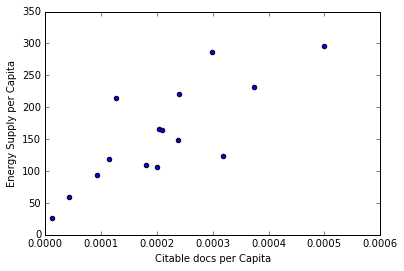

In [240]:
plot9()

In [256]:
Top15 = answer_one()
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
Top15.loc[:,['PopEst','Citable docs per Capita']].corr(method='pearson')

,PopEst,Citable docs per Capita
PopEst,1.000000,-0.529654
Citable docs per Capita,-0.529654,1.000000


In [257]:
Top15.loc[:,['PopEst','Citable docs per Capita']].corr(method='pearson').iloc[0,1]

-0.52965391786936222

In [259]:
Top15.corr()['PopEst'].loc['Citable docs per Capita']

-0.52965391786936222

In [250]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

In [255]:
Top15.loc[:,['PopEst','Citable docs per Capita']].corr()

,PopEst,Citable docs per Capita
PopEst,1.000000,-0.529654
Citable docs per Capita,-0.529654,1.000000


### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [245]:
def answer_ten():
    Top15 = answer_one()
    return "ANSWER"

In [249]:
Top15 = answer_one()

groupby = lambda x: 1 if x >= Top15["% Renewable"].median() else 0
group = Top15["% Renewable"].apply(groupby)
group.rename("HighRenew", inplace=True)
group

Country
Brazil                1
Australia             0
Iran                  0
Spain                 1
Italy                 1
South Korea           0
France                1
India                 0
Germany               1
Canada                1
Russian Federation    1
United Kingdom        0
Japan                 0
United States         0
China                 1
Name: HighRenew, dtype: int64

In [248]:
Top15.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Group_Renewable
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,1
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.810810,...,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12,0
Iran,13,8896,8819,57470,19125,6.46,72,9.172000e+09,119.0,5.707721,...,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN,0
Spain,12,9428,9330,123336,23964,13.08,115,4.923000e+09,106.0,37.968590,...,1.468146e+12,1.484530e+12,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12,1
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,...,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,1


### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [ ]:
def answer_eleven():
    Top15 = answer_one()
    return "ANSWER"

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [ ]:
def answer_twelve():
    Top15 = answer_one()
    return "ANSWER"

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [ ]:
def answer_thirteen():
    Top15 = answer_one()
    return "ANSWER"

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!